In [69]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import tweepy
import time
from datetime import datetime
import random as rd
import json
import os
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [67]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [57]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [58]:
target_term = "@PlotRobo"

In [63]:
def sentiment_pd (target):
    
    columns = ["compound","positive","negative","neutral"]
    news_df = pd.DataFrame(columns=columns)
    tweetID_list = []
    datetime_list = []
    timestamp_list = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    counter = 1
    
    for x in range(1,25):
        tweets = api.user_timeline(target, page=x)
        
        for tweet in tweets:
            tid = counter
            tim = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            com = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            tweetID_list.append(tid)
            datetime_list.append(tim.strftime("%Y-%m-%d %H:%M:%S"))
            timestamp_list.append(tim.timestamp())
            compound_list.append(com)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
    
            counter += 1
    
    sentiment = {
        "Tweet_counter": tweetID_list,
        "datetime": datetime_list,
        "timestamp": timestamp_list,
        "Compound": compound_list,
        "Positive":positive_list,
        "Neutral": negative_list,
        "Negative": neutral_list
    }
    
    news_df = pd.DataFrame.from_dict(sentiment)
    return news_df

In [95]:
def pull_target(text):
    strlist = text.split(' ')
    if strlist[0] == "@PlotRobo" and strlist[1] == "Analyze:" and strlist[2][0] == "@":
        print("True")


In [96]:
pull_target("@PlotRobo Analyzle: @CNN")

In [64]:
# def Analyzer():
#     public_tweets = api.search(target_term, count=100, result_type="recent")

#     for tweet in public_tweets["statuses"]:
#         tweet_id = tweet["id"]
#         tweet_author = tweet["user"]["screen_name"]
#         tweet_text = tweet["text"]
#         print(tweet_id)

#         try:
#             # Respond to tweet
#             target = pull_target(tweet_text)
#             if target != None:
#                 df = sentiment_pd(target)
#                 news_plot = df.plot(kind='scatter', x='Tweet_counter', y='Compound', color="white", alpha=0.75, linewidth=0, figsize=(4,3))
#                 news_plot.set_ylim((-1.10, 1.10))
#                 news_plot.set_facecolor("lightslategray")
#                 news_plot.grid(color="white", linestyle="dashed", alpha=0.4)
#                 plt.legend([news_agency_names[2]], loc='center left', bbox_to_anchor=(1.0, 0.5), facecolor="lightslategray")
#                 plt.suptitle("sentiment analysis {}".format(target))
#                 file_name = target + "_plotbot.csv"
#                 file_path = os.path.join("Resources", file_name)
#                 plt.savefig(file_path)
#                 plt.show()
            
#             api.update_with_media( file_path, "Analysis requested by @%s" % tweet_author, in_reply_to_status_id=tweet_id)

#             print("Successful response!")

#         except Exception:            # Print message if duplicate
#             print("Already responded to this one!")

#         # Print message to signify complete cycle
#         print("We're done for now. I'll check again in 5 minutes.")

In [65]:
# while(True):
#     Analyzer()
#     time.sleep(300)

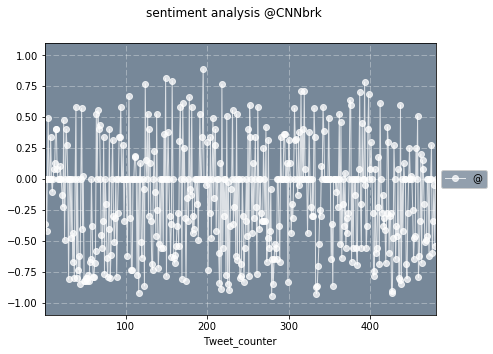

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Apr 12 00:17:54 +0000 2018',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/2MuUYkYoDv',
    'expanded_url': 'https://twitter.com/PlotRobo/status/984224050330222592/photo/1',
    'id': 984224048459628544,
    'id_str': '984224048459628544',
    'indices': [34, 57],
    'media_url': 'http://pbs.twimg.com/media/DaiqjrPVQAA-A22.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DaiqjrPVQAA-A22.jpg',
    'sizes': {'large': {'h': 360, 'resize': 'fit', 'w': 504},
     'medium': {'h': 360, 'resize': 'fit', 'w': 504},
     'small': {'h': 360, 'resize': 'fit', 'w': 504},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/2MuUYkYoDv'}],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 980136518244118528,
    'id_str': '980136518244118528',
    'indices': [23, 33],
    'name': 'Jonathan Ahn',
    'screen_name': 'jjahn1977'}]},
 'extended_en

In [74]:
target = "@CNNbrk"
df = sentiment_pd(target)
news_plot = df.plot(kind='line', x='Tweet_counter', y='Compound', color="white", alpha=0.75, marker='o', linewidth=1, figsize=(7,5))
news_plot.set_ylim((-1.10, 1.10))
news_plot.set_facecolor("lightslategray")
news_plot.grid(color="white", linestyle="dashed", alpha=0.4)
plt.legend(target, loc='center left', bbox_to_anchor=(1.0, 0.5), facecolor="lightslategray")
plt.suptitle("sentiment analysis {}".format(target))
file_name = target + "_plotbot.png"
file_path = os.path.join("Resources", file_name)
plt.savefig(file_path)
plt.show()

tweet_author = "@jjahn1977"
api.update_with_media( file_path, "Analysis requested by @%s" % tweet_author)

In [13]:
public_tweets = api.search(target_term, count=10, result_type="recent")

In [14]:
from pprint import pprint
pprint(public_tweets)

{'search_metadata': {'completed_in': 0.018,
                     'count': 10,
                     'max_id': 984200100879544321,
                     'max_id_str': '984200100879544321',
                     'query': '%40PlotRobo',
                     'refresh_url': '?since_id=984200100879544321&q=%40PlotRobo&result_type=recent&include_entities=1',
                     'since_id': 0,
                     'since_id_str': '0'},
 'statuses': [{'contributors': None,
               'coordinates': None,
               'created_at': 'Wed Apr 11 22:42:44 +0000 2018',
               'entities': {'hashtags': [],
                            'symbols': [],
                            'urls': [],
                            'user_mentions': [{'id': 982376060451831808,
                                               'id_str': '982376060451831808',
                                               'indices': [0, 9],
                                               'name': 'Doctor Khan',
                   